In [1]:
import numpy as np
import timeit
import matplotlib.pyplot as plt
import seaborn

In [2]:
# Global Variables.
filepath = "/Users/Chrisdon/Documents/Training/Python/data/" # Change this to the path containing the sample data

## Methods for creating arrays

In [3]:
temp_celcius = [20.1, 20.8, 21.9, 22.5, 22.7, 22.3, 21.8, 21.2, 20.9, 20.1] # Python List
np.array(temp_celcius, dtype='float32') # np.array can be used to to create an array from a Python list
# Create an array filled with a linear sequence starting at 0, ending at 9
np.arange(10)
# Create a length-10 integer array filled with zeros
np.zeros(10, dtype=int)
# Create a 3x5 floating-point array filled with 1s
np.ones((3, 5), dtype=float)
# Create a 3x5 array filled with 3.14
np.full((3, 5), 3.14)
# Create an array filled with a linear sequence starting at 0, ending at 20, stepping by 2
np.arange(0, 20, 2)
# Create an array of five values evenly spaced between 0 and 1
np.linspace(0, 1, 5)
# Create a 3x3 array of uniformly distributed random values between 0 and 1
np.random.random((3, 3))
# Create a 3x3 array of normally distributed random values with mean 0 and standard deviation 1
np.random.normal(0, 1, (3, 3))
# Create a 3x3 array of random integers in the interval [0, 10)
np.random.randint(0, 10, (3, 3))

array([[4, 0, 0],
       [3, 6, 5],
       [0, 9, 1]])

## NumPy Array Attributes
Each array has attributes:
* ndim (the number of dimensions)
* shape (the size of each dimension) 
* size (the total size of the array)

Defining three random arrays: one-dimensional, two-dimensional, and three-dimensional arrays using NumPy’s random number generator. Seed with a set value to ensure that the same random arrays are generated each time this code is run.

In [4]:
np.random.seed(0) # seed for reproducibility
x1 = np.random.randint(20, size=10) # One-dimensional array
x2 = np.random.randint(10, size=(3, 4)) # Two-dimensional array
x3 = np.random.randint(10, size=(3, 4, 5)) # Three-dimensional array

In [5]:
print("x3 ndim: ", x3.ndim)
print("x3 shape:", x3.shape)
print("x3 size: ", x3.size)
print("dtype:", x3.dtype)
print("Item size", x3.itemsize)
print("Number of bytes", x3.nbytes)

x3 ndim:  3
x3 shape: (3, 4, 5)
x3 size:  60
dtype: int32
Item size 4
Number of bytes 240


## Array Indexing

In [6]:
x3
x3[1] # get the second array
x3[1,2] # get the third row from the second array

array([5, 5, 6, 8, 4])

## Array Slicing: Accessing Subarrays
Just as we can use square brackets to access individual array elements, we can also use them to access subarrays with the slice notation: x[start:stop:step]

In [7]:
x1
x1[:5] # first five elements
x1[5:] # elements after index 5
x1[4:7] # middle subarray
x1[::2] # every other element
x1[1::2] # every other element, starting at index 1
x1[::-1] # all elements, reversed
x1[5::-2] # reversed every other from index 5

array([ 7,  3, 15])

In [8]:
x2
x2[:2, :3] # two rows, three columns
x2[:3, ::2] # all rows, every other column
x2[::-1, ::-1] # reverse subarray dimensions

array([[9, 5, 1, 8],
       [7, 7, 6, 1],
       [8, 8, 6, 7]])

### Subarrays as no-copy views
Array slices return views rather than copies of the array data. If you modify the subarray in a new object,the original array is modified. It may be useful to explicitly copy the data within an array or a subarray using the copy() method.

In [9]:
x2
x2_no_copy = x2[:2, :2] # extract a 2×2 subarray from x2
x2_no_copy[0, 0] = 99 # Modify the first element in the new object
x2 # The first element in the original array is changed

x2_copy = x2[:2, :2].copy()
x2_copy[0, 0] = 42
x2_copy
x2

array([[99,  6,  8,  8],
       [ 1,  6,  7,  7],
       [ 8,  1,  5,  9]])

### Reshaping of Arrays
Note: For the reshape() method to work, the size of the initial array must match the size of the reshaped array

In [10]:
temp_array = np.arange(1, 10)
temp_array.shape
# convert one dimensional array into a 3×3 grid
grid = temp_array.reshape((3, 3))
grid
grid.shape

temp_array = np.array([1, 2, 3])
# row vector via reshape
temp_array.reshape((1, 3))
temp_array.shape
# row vector via newaxis
temp_array[np.newaxis, :]
# column vector via reshape
temp_array.reshape((3, 1))
# column vector via newaxis
temp_array[:, np.newaxis]

array([[1],
       [2],
       [3]])

In [11]:
# Concatenation of NumPy Arrays
a = [1, 2, 3]
b = [4, 5, 6]
c = [7, 8, 9]
grid = np.concatenate([a, b, c]).reshape((3, 3))
grid
# concatenate two-dimensional arrays
np.concatenate([grid, grid]) # concatenate along the first axis
np.concatenate([grid, grid], axis=1) # concatenate along the second axis (zero-indexed)
x = np.array([1, 2, 3])
grid = np.array([[9, 8, 7],
                 [6, 5, 4]])
# vertically stack the arrays
np.vstack([x, grid])
# horizontally stack the arrays
y = np.array([[99], [99]])
np.hstack([grid, y])

array([[ 9,  8,  7, 99],
       [ 6,  5,  4, 99]])

In [12]:
# The opposite of concatenation is splitting, which is implemented by the functions np.split, np.hsplit, and np.vsplit
x = [1, 2, 3, 99, 99, 3, 2, 1]
x1, x2, x3 = np.split(x, [3, 5])
x1, x2, x3
grid = np.arange(16).reshape((4, 4))
grid
upper, lower = np.vsplit(grid, [2])
upper, lower
left, right = np.hsplit(grid, [2])
left, right

(array([[ 0,  1],
        [ 4,  5],
        [ 8,  9],
        [12, 13]]),
 array([[ 2,  3],
        [ 6,  7],
        [10, 11],
        [14, 15]]))

### Array arithmetic

In [13]:
x = np.arange(5)
print("x =", x)
print("x + 5 =", x + 5)
print("x - 5 =", x - 5)
print("x * 2 =", x * 2)
print("x / 2 =", x / 2)
print("x // 2 =", x // 2) # floor division
print("-x = ", -x) # unary ufunc for negation
print("x ** 2 = ", x ** 2) # ** operator for exponentiation
print("x % 2 = ", x % 2) # % operator for modulus
print("sqrt(x) = ", np.sqrt(x))

x = [0 1 2 3 4]
x + 5 = [5 6 7 8 9]
x - 5 = [-5 -4 -3 -2 -1]
x * 2 = [0 2 4 6 8]
x / 2 = [0.  0.5 1.  1.5 2. ]
x // 2 = [0 0 1 1 2]
-x =  [ 0 -1 -2 -3 -4]
x ** 2 =  [ 0  1  4  9 16]
x % 2 =  [0 1 0 1 0]
sqrt(x) =  [0.         1.         1.41421356 1.73205081 2.        ]


In [14]:
# Trigonometric functions
np.add(x, 2)
x = x * -1
abs(x)
theta = np.linspace(0, np.pi, 3)
print("theta = ", theta)
print("sin(theta) = ", np.sin(theta))
print("cos(theta) = ", np.cos(theta))
print("tan(theta) = ", np.tan(theta))

x = [-1, 0, 1]
print("x = ", x)
print("arcsin(x) = ", np.arcsin(x))
print("arccos(x) = ", np.arccos(x))
print("arctan(x) = ", np.arctan(x))

theta =  [0.         1.57079633 3.14159265]
sin(theta) =  [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta) =  [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta) =  [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]
x =  [-1, 0, 1]
arcsin(x) =  [-1.57079633  0.          1.57079633]
arccos(x) =  [3.14159265 1.57079633 0.        ]
arctan(x) =  [-0.78539816  0.          0.78539816]


In [15]:
# Exponents
x = [1, 2, 3]
print("x =", x)
print("e^x =", np.exp(x))
print("2^x =", np.exp2(x))
print("3^x =", np.power(3, x))
# logarithms
x = [1, 2, 4, 10]
print("x =", x)
print("ln(x) =", np.log(x))
print("log2(x) =", np.log2(x))
print("log10(x) =", np.log10(x))

x = [1, 2, 3]
e^x = [ 2.71828183  7.3890561  20.08553692]
2^x = [2. 4. 8.]
3^x = [ 3  9 27]
x = [1, 2, 4, 10]
ln(x) = [0.         0.69314718 1.38629436 2.30258509]
log2(x) = [0.         1.         2.         3.32192809]
log10(x) = [0.         0.30103    0.60205999 1.        ]


In [16]:
# Aggregates
x = np.arange(1, 6)
x
np.add.reduce(x)
np.multiply.reduce(x)
np.add.accumulate(x)
np.multiply.accumulate(x)

array([  1,   2,   6,  24, 120], dtype=int32)

### Aggregations

In [17]:
np.random.seed(0)
big_array = np.random.rand(1000000)
np.sum(big_array)
np.min(big_array)
np.max(big_array)

0.9999997207656334

### Computation on Arrays: Broadcasting
Broadcasting allowsbinary operations to be performed on arrays of different sizes

#### Broadcasting Rules
When operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing (i.e. rightmost) dimensions and works its way left. Two dimensions are compatible when:

* they are equal, or
* one of them is 1

In [18]:
a = np.array([0, 1, 2], dtype='float32')
a + 5 # adding a scalar to an array
b = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
], dtype='int') 
b + 5 # adding a scalar to a multi-dimensional array
c = np.ones((3, 4), dtype='int')
b + c # one-dimensional array "c" is broadcast across the multi-dimensional array to match the shape of "b"

a = np.arange(3)
b = np.arange(3)[:, np.newaxis]
a
b
a + b # broadcasting results in a two dimensional array

# Broadcasting provides a convenient way of taking the outer product (or any other outer operation) of two arrays.
a = np.array([0.0, 10.0, 20.0, 30.0])
b = np.array([1.0, 2.0, 3.0])
a[:, np.newaxis] + b

array([[ 1.,  2.,  3.],
       [11., 12., 13.],
       [21., 22., 23.],
       [31., 32., 33.]])

#### Broadcasting Examples

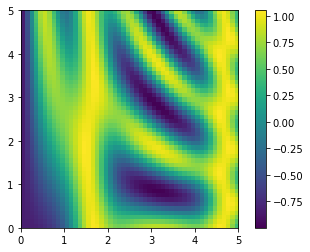

In [19]:
# Centering a 10×3 array 
X = np.random.random((10, 3))
Xmean = X.mean(0)
X_centered = X - Xmean # center the X array by subtracting the mean (this is a broadcasting operation)
X_centered.mean(0)

# Plotting a two-dimensional function. If we want to define a function z = f(x, y), broadcasting can be
# used to compute the function across the grid

# x and y have 50 steps from 0 to 5
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]
z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)
%matplotlib inline
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5],
cmap='viridis')
plt.colorbar();

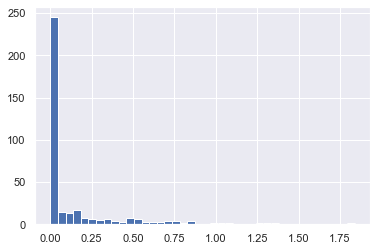

Number days with rainfall between 0.5 and 1.0 inches:  29
Number days without rain:  215
Number days with rain:  150
Days with more than 0.5 inches: 37
Rainy days with < 0.1 inches : 75
Median precip on rainy days in 2014 (inches):  0.19488188976377951
Median precip on summer days in 2014 (inches):  0.0
Maximum precip on summer days in 2014 (inches):  0.8503937007874016
Median precip on non-summer rainy days (inches): 0.20078740157480315


In [20]:
# Analyzing Rainy Days in Seattle. Read precipitation column (PRCP) into the array  
rainfall = np.loadtxt(filepath + 'Seattle2014.csv', delimiter=',', skiprows=1, usecols=3)
inches = rainfall / 254 # 1/10mm -> inches
inches.shape
%matplotlib inline
seaborn.set() # Plot styling
plt.hist(inches, 40)
plt.show()
print("Number days with rainfall between 0.5 and 1.0 inches: ", np.sum((inches > 0.5) & (inches < 1)))
print("Number days without rain: ", np.sum(inches == 0))
print("Number days with rain: ", np.sum(inches != 0))
print("Days with more than 0.5 inches:", np.sum(inches > 0.5))
print("Rainy days with < 0.1 inches :", np.sum((inches > 0) & (inches < 0.2)))

# construct a mask of all rainy days
rainy = (inches > 0)
# construct a mask of all summer days (June 21st is the 172nd day)
summer = (np.arange(365) - 172 < 90) & (np.arange(365) - 172 > 0)
print("Median precip on rainy days in 2014 (inches): ", np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches): ", np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches): ", np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches):", np.median(inches[rainy & ~summer]))

### Sorting Arrays

In [21]:
# selection sort UDF repeatedly finds the minimum value from a list, and makes swaps until the list is sorted.
# It has an O(n2) time complexity, which makes it inefficient on large list. 
# For a list of N values, it requires N loops, each of which does on the order of ~ N comparisons to find the
# swap value. if you double the number of items in the list, the execution time will go up by about a factor of four
def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x

# this permutation sort is an inefficient sorting algorithm should never be used for any real computation.
# O(N × N!) (N times N factorial)
def bogosort(x):
    while np.any(x[:-1] > x[1:]):
        np.random.shuffle(x)
    return x

#x = np.array([2, 1, 4, 3, 5])
np.random.seed(0)
big_array = np.random.rand(100)
%timeit selection_sort(big_array)
%timeit bogosort(big_array)

# NumPy’s np.sort function turns out to be much more efficient
# The default sorting algorithm is ‘quicksort’. kind{‘quicksort’, ‘mergesort’, ‘heapsort’, ‘stable’}, 
%timeit np.sort(big_array, kind = 'quicksort')

293 µs ± 12.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
4.23 µs ± 135 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
2.98 µs ± 88.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [22]:
# Sorting along rows or columns
rand = np.random.RandomState(42)
matrix = rand.randint(0, 10, (4, 6))
matrix
np.sort(matrix, axis=0) # sort each column of matrix
np.sort(matrix, axis=1) # sort each row of matrix

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

### Example: k-Nearest Neighbors

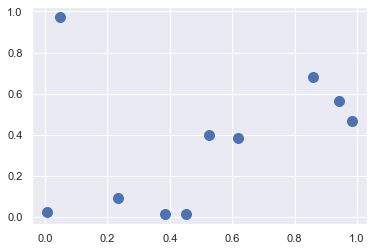

In [23]:
X = rand.rand(10, 2)
%matplotlib inline
seaborn.set() # Plot styling
plt.scatter(X[:, 0], X[:, 1], s=100)

[[0 3 9 7 1 4 2 5 6 8]
 [1 4 7 9 3 6 8 5 0 2]
 [2 1 4 6 3 0 8 9 7 5]
 [3 9 7 0 1 4 5 8 6 2]
 [4 1 8 5 6 7 9 3 0 2]
 [5 8 6 4 1 7 9 3 2 0]
 [6 8 5 4 1 7 9 3 2 0]
 [7 9 3 1 4 0 5 8 6 2]
 [8 5 6 4 1 7 9 3 2 0]
 [9 7 3 0 1 4 5 8 6 2]]


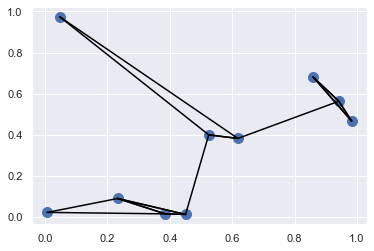

In [24]:
# Compute the distance between each pair of points. The squared distance between two points is the sum of the 
# squared differences in each dimension; Compute the matrix of square distances using the efficient broadcasting
# and aggregation routines:
dist_sq = np.sum((X[:,np.newaxis,:] - X[np.newaxis,:,:]) ** 2, axis=-1)
# Break down the above calculation into its component steps
# for each pair of points, compute differences in their coordinates
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape
# square the coordinate differences
sq_differences = differences ** 2
sq_differences.shape
# sum the coordinate differences to get the squared distance
dist_sq = sq_differences.sum(-1)
dist_sq.shape
# Verify the outcome by examining the diagonal of this matrix (i.e., the set of distances between each point and itself) 
# is all zero:
dist_sq.diagonal()
# With the pairwise square-distances converted use np.arg sort to sort along each row. 
# The leftmost columns will then give the indices of the nearest neighbors
nearest = np.argsort(dist_sq, axis=1)
print(nearest)
# we’re simply interested in the nearest k neighbors, all we need is to partition each
# row so that the smallest k + 1 squared distances come first, with larger distances filling 
# the remaining positions of the array.
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)
# visualize this network of neighbors, let’s quickly plot the points along with
# lines representing the connections from each point to its two nearest neighbors
plt.scatter(X[:, 0], X[:, 1], s=100)
# draw lines from each point to its two nearest neighbors
K = 2
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        plt.plot(*zip(X[j], X[i]), color='black') # plot a line from X[i] to X[j]
# Each point in the plot has lines drawn to its two nearest neighbors. At first glance, it
# might seem strange that some of the points have more than two lines coming out of
# them: this is due to the fact that if point A is one of the two nearest neighbors of point
# B, this does not necessarily imply that point B is one of the two nearest neighbors of
# point A.

### Structured Data: NumPy’s Structured Arrays

In [25]:
# Use a compound data type for structured arrays
data = np.zeros(4, dtype={'names':('name', 'age', 'weight'),
                          'formats':('U10', 'i4', 'f8')})
# formats: 'U10' translates to “Unicode string of maximum length 10,” 'i4' translates to
# “4-byte (i.e., 32 bit) integer,” and 'f8' translates to “8-byte (i.e., 64 bit) float

data['name'] = ['Alice', 'Bob', 'Cathy', 'Doug']
data['age'] = [25, 45, 37, 19]
data['weight'] = [55.0, 85.5, 68.0, 61.5]
data

# Get all names
data['name']
# Get second name
data['name'][1]

# Get first row of data
data[0]
# Get the name from the last row
data[-1]['name']
# Get names where age is under 30
data[data['age'] < 30]['name']
# Creating Structured Arrays
np.dtype({'names':('name', 'age', 'weight'),
          'formats':((np.str_, 10), int, np.float32)})

dtype([('name', '<U10'), ('age', '<i4'), ('weight', '<f4')])

# Numpy Performance
This operation is very slow due to the type-checking and function dispatches that CPython must do at each cycle of the loop. Each time the reciprocal is computed, Python first examines the object’s type and does a dynamic lookup of the correct function to use for that type. If we were working in compiled code instead, this type specification would be known before the code executes and the result could be computed much more efficiently.

In [26]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

150 ms ± 3.99 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
934 µs ± 10.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


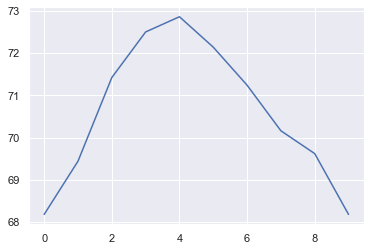

In [27]:
# numpy conversion (no loop)
def numpy2fahrenheit(temps):
    return (temps * 9 / 5 + 32)

# List comp to calc temp conversion
def list2fahrenheit(temps):
    return [x * 9 / 5 + 32 for x in temps]

temp_celcius = np.array([20.1, 20.8, 21.9, 22.5, 22.7, 22.3, 21.8, 21.2, 20.9, 20.1], dtype='float32')
temp_fahrenheit = numpy2fahrenheit(temp_celcius)
temp = list2fahrenheit(temp_celcius)
plt.plot(temp_fahrenheit)
plt.show()

In [28]:
loops = 1000  # number executions of the main statement
repeat = 3 #  how many times to call timeit()

code_setup = '''
import numpy as np
size_of_vec = 100000
def pure_python_version():
    X = range(size_of_vec)
    Y = range(size_of_vec)
    Z = [X[i] + Y[i] for i in range(len(X))]
    return Z
'''

code_body = 't1 = pure_python_version()'
timings = timeit.repeat(setup=code_setup,
                      stmt=code_body,
                      repeat=repeat,
                      number=loops)
print('{} loops, best of {}: {} per loop'.format(loops, repeat, min(timings)))

code_setup = '''
import numpy as np
size_of_vec = 100000
def numpy_version():
    X = np.arange(size_of_vec)
    Y = np.arange(size_of_vec)
    Z = X + Y
    return Z
'''
code_body = 't2 = numpy_version()'
timings = timeit.repeat(setup=code_setup,
                      stmt=code_body,
                      repeat=repeat,
                      number=loops)
print('{} loops, best of {}: {} per loop'.format(loops, repeat, min(timings)))


1000 loops, best of 3: 26.6560554 per loop
1000 loops, best of 3: 0.17804939999999192 per loop


In [29]:
code_setup = '''
import numpy as np
np.random.seed(0)
def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output
big_array = np.random.randint(1, 100, size=10000)
'''
code_body = 'compute_reciprocals(big_array)'
loops = 1000  # number executions of the main statement
repeat = 3 #  how many times to call timeit()
timings = timeit.repeat(setup=code_setup,
                      stmt=code_body,
                      repeat=repeat,
                      number=loops)
print('{} loops, best of {}: {} per loop'.format(loops, repeat, min(timings)))

1000 loops, best of 3: 19.55417650000001 per loop


The most efficient alternative is performing the operation on the array, which will then be applied to each element. This vectorized approach is designed to push the loop into the compiled layer that underlies NumPy, leading to much faster execution.

In [30]:
code_setup = ''' 
import numpy as np
np.random.seed(0)
def compute_reciprocals(values):
    output = 1.0 / values  # Vecortized operation
    return output
big_array = np.random.randint(1, 100, size=10000)
'''
code_body = 'compute_reciprocals(big_array)'
timings = timeit.repeat(setup=code_setup,
                    stmt=code_body,
                    repeat=repeat,
                    number=loops)
print('{} loops, best of {}: {} per loop'.format(loops, repeat, min(timings)))

1000 loops, best of 3: 0.01464099999998325 per loop


### Linear Algebra
Linear algebra is often also used to solve a system of equations. Using the matrix notation of system of equations and the provided function of numpy, we can easily solve such a system of equation.

7x + 5y -3z = 16

3x - 5y + 2z = -8

5x + 3y - 7z = 0

We can also check if the solution is correct using the np.allclose function

In [3]:
a = np.array([[7,5,-3], [3,-5,2],[5,3,-7]])
b = np.array([16,-8 ,0])
x = np.linalg.solve(a, b)
x

array([1., 3., 2.])

In [4]:
np.allclose(np.dot(a, x), b)

True